Possible figure for "Creating a World of Make-Believe to Better Understand the Real Universe" LBNL article (Dec 2017).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
from desisim.templates import QSO, ELG, BGS, LRG
%matplotlib inline

In [2]:
seed = 1

In [3]:
def specplot(wave, flux, prefix):
    """https://goo.gl/EDRto3"""
    nspec, npix = flux.shape
    xx = np.linspace(0, 1, npix)
    for ii in range(nspec):
        ff = np.squeeze(flux[ii, :])
        points = np.array([wave, ff]).transpose().reshape(-1, 1, 2)
        segs = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segs, cmap=plt.get_cmap('rainbow'))
        lc.set_array(xx)
        
        fig, ax = plt.subplots()
        ax.add_collection(lc) # add the collection to the plot
        ax.set_xlim(wave.min(), wave.max())
        ax.set_ylim(ff.min(), ff.max())
        ax.axis('off')
        fig.savefig('{}-{:01}.png'.format(prefix, ii), transparent=True)

### ELGs

In [4]:
ee = ELG(minwave=4000, maxwave=1e4)
eflux, ewave, emeta = ee.make_templates(3, seed=seed)

INFO:io.py:967:read_basis_templates: Reading /Users/ioannis/work/desi/spectro/templates/basis_templates/v2.3/elg_templates_v2.0.fits


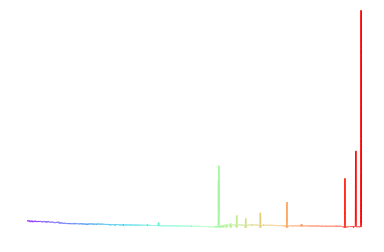

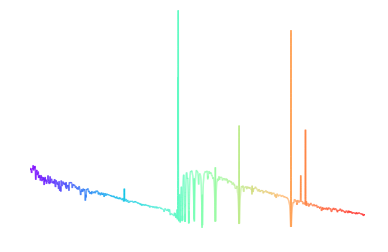

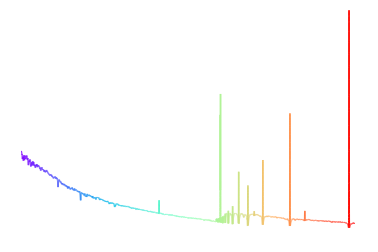

In [5]:
specplot(ewave, eflux, 'elg')

### QSOs

In [6]:
qq = QSO(minwave=3300)
qflux, qwave, qmeta = qq.make_templates(3, nocolorcuts=True, lyaforest=True, seed=seed)

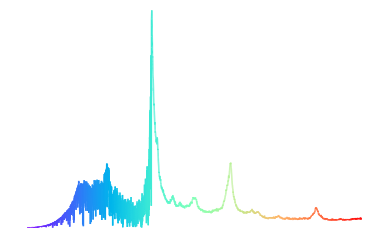

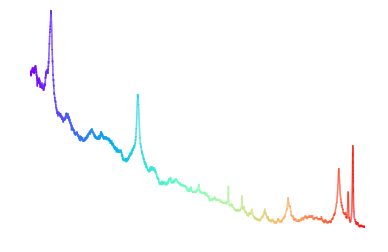

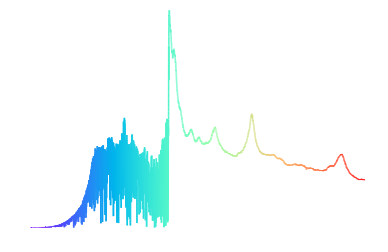

In [7]:
specplot(qwave, qflux, 'qso')